# Generating Areas of Interest (AOIs)
This notebook gives examples of generating AOIs from code and from raw gaze data.

## Contents:
[Generating AOIs from code](#Generating-AOIs-from-code)  
[Generating AOIs from gaze data](#Generating-AOIs-from-gaze-data)  
[Putting the AOI types together](#Putting-the-AOI-types-together)  

## Generating AOIs from code
The first step of this procedure is to generate a mask. 
Code is masked by eliminating whitespace. A logical numpy array is produced.

In [1]:
import scipy.ndimage
import matplotlib.pyplot as plt
from itrace_post import get_code_envelope, generate_code_mask

In [2]:
code_file = "sample-data/code-files/Space.java"

# Get the bounds of the file, in zero-indexed column/line numbers.
width, height = get_code_envelope(code_file)

print(width, height)

(78, 61)


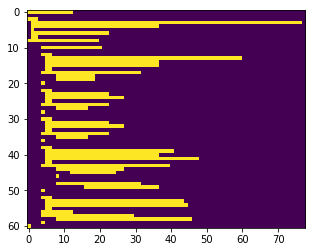

In [3]:
# Generate a code mask
code_mask = generate_code_mask(code_file, width, height)
plt.imshow(code_mask)
plt.show()

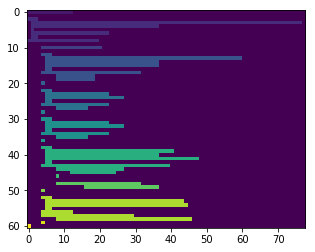

In [4]:
# Label individual features in the logical array
all_labels, num_features = scipy.ndimage.label(code_mask)
plt.imshow(all_labels)
plt.show()

Each cell in each distinct region is labeled with a number between 1 and the number of identified regions. You can match a fixation to any of these areas by checking the value in the `all_labels` array at any given line and column. At this point, the maximum value in `all_labels` is also the total number of identified regions.

## Generating AOIs from gaze data
This procedure is similar to that of generating a set of AOIs from code, but it uses smoothing and thresholding to extract the areas that subjects viewed most regularly.

In [5]:
import scipy.ndimage
import matplotlib.pyplot as plt
from itrace_post import get_code_envelope, generate_gaze_mask

In [6]:
# Note: this file does not contain real data.
data_file = "sample-data/data-files/random-fixations.csv"

# As before, we need to load the dimensions of a corresponding code file.
code_file = "sample-data/code-files/Space.java"

# Get the bounds of the file, in zero-indexed column/line numbers.
width, height = get_code_envelope(code_file)

print(width, height)

(78, 61)


This particular algorithm can also be used on data where the stimulus was a generic image, and not a code file. In this case, the basic spatial unit is the pixel, and the width, height and fixation coordinates should be given as pixels.

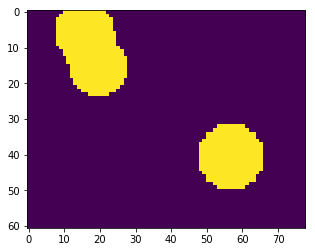

In [7]:
# Generate a gaze mask
gaze_mask = generate_gaze_mask(
    data_file, 
    width, height,
    x_fieldname="fix_col", 
    y_fieldname="fix_line", 
    dur_fieldname="fix_dur"
)

plt.imshow(gaze_mask)
plt.show()

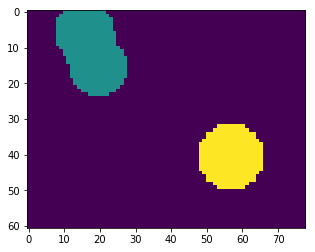

In [8]:
# Label individual features in the logical array
all_labels, num_features = scipy.ndimage.label(gaze_mask)
plt.imshow(all_labels)
plt.show()

As before, we now have a numpy array whose distinct regions are numbered accordingly. We can also vary the smoothing and threshold parameters:

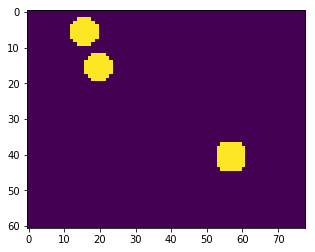

In [9]:
# The smoothing paramter is now less than the default, 
#   and the threshold is greater.
gaze_mask = generate_gaze_mask(
    data_file, 
    width, height, 
    x_fieldname="fix_col", 
    y_fieldname="fix_line", 
    dur_fieldname="fix_dur",
    smoothing=2.0, 
    threshold=0.1
)

plt.imshow(gaze_mask)
plt.show()

## Putting the AOI types together
It may be useful to generate AOIs that represent the intersection between those inherent in a code document and those that can be found within gaze data. For this, we have a single function.

In [10]:
import scipy.ndimage
import matplotlib.pyplot as plt
from itrace_post import get_aoi_intersection

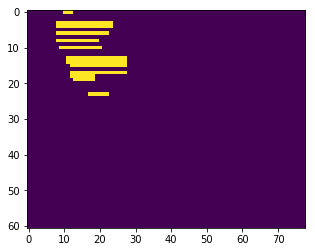

In [11]:
mask, labels, rectangles = \
    get_aoi_intersection(
        width, height, code_file, data_file,
        x_fieldname="fix_col", y_fieldname="fix_line", 
        dur_fieldname="fix_dur"
    )
    
plt.imshow(mask)
plt.show()

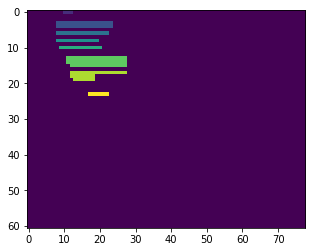

In [12]:
plt.imshow(labels)
plt.show()

The third value is a list of dictionaries describing rectangle objects that inscribe each of these regions. We see that the rectangle has fields B, R, L and T for Bottom, Right, Left and Top respectively.

In [13]:
import json
json.dumps(rectangles)

'[{"B": 15, "R": 27, "L": 11, "T": 13}, {"B": 19, "R": 27, "L": 12, "T": 17}, {"B": 4, "R": 23, "L": 8, "T": 3}, {"B": 0, "R": 12, "L": 10, "T": 0}, {"B": 6, "R": 22, "L": 8, "T": 6}, {"B": 8, "R": 19, "L": 8, "T": 8}, {"B": 10, "R": 20, "L": 9, "T": 10}, {"B": 23, "R": 22, "L": 17, "T": 23}]'